# Decision tree is the process of splitting down the classes into further subclasses by using Entropy and Gini to find on what basis the classses have to be splitted.After splitting class on subclass if entropy and gini are minimum,then it proceed with same root class
### Gini index shows a chance of predicting data's class label wrong.
### Entropy shows how mixed the data is i.e. same data belonging to different class.
### lower entropy and Gini Index both indicate more purity in the data with most element belonging to same class.

### Let us assume dataset as <br>
<img src = 'dataset.png'/>

### Lets split classes in above dataframe on the basis of colors as:
<img src = "tree.png"/>

## In above root class is 'Color' which is splitted into Red,Yellow and Green and further in to apples,Bananas and Apples.Now Decision tree calculates Entropy and Gini for for before and after split and if the result of entropy and gini after split is  less than before split or zero after splitting, then it proceed with same root class else it will be taking another class as its root class and calculates the entropy and gini before and after splits

In [1]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('salaries.csv')

In [13]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [15]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

<Axes: xlabel='salary_more_then_100k', ylabel='count'>

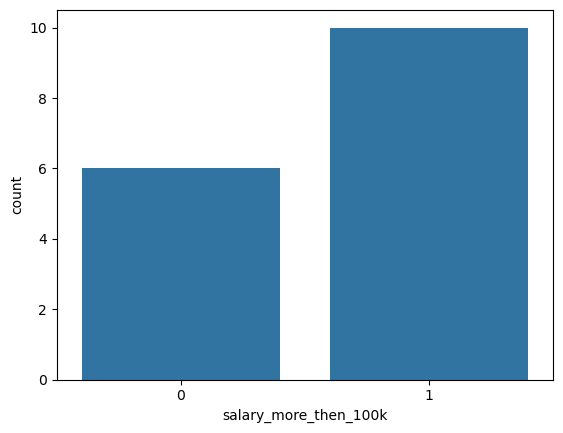

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= df['salary_more_then_100k'],data = df)

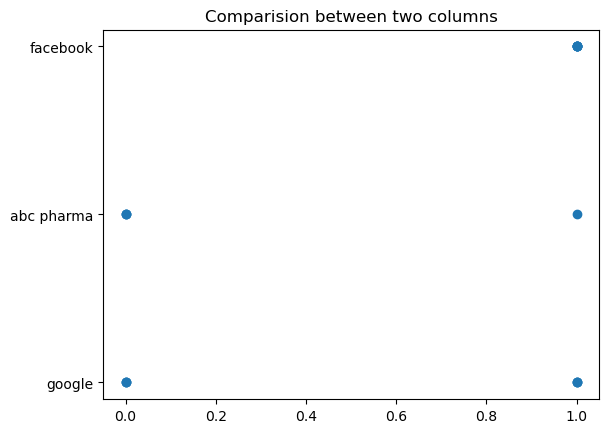

In [27]:
plt.scatter(x= 'salary_more_then_100k',y='company',data = df)
plt.title("Comparision between two columns")
plt.show()

In [35]:
df_encoded = pd.get_dummies(data = df,columns=['company','job','degree'],dtype=np.int32)
# df['company'].nunique()

In [47]:
from sklearn.model_selection import train_test_split
df_encoded.rename(columns={'salary_more_then_100k':'salary'},inplace= True)
X = df_encoded.drop(['salary'],axis = 1)
Y = df_encoded['salary']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [49]:
df_encoded.shape,X_train.shape,X_test.shape

((16, 9), (12, 8), (4, 8))

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred = DTC.predict(X_test)
accuracy_score(Y_test,y_pred)


0.75

In [59]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(Y_test,y_pred)
cn

array([[1, 1],
       [0, 2]], dtype=int64)

## cn in above cant be understand .So lets draw a heatmap and analyse it more efficiently

Text(50.722222222222214, 0.5, 'Actual')

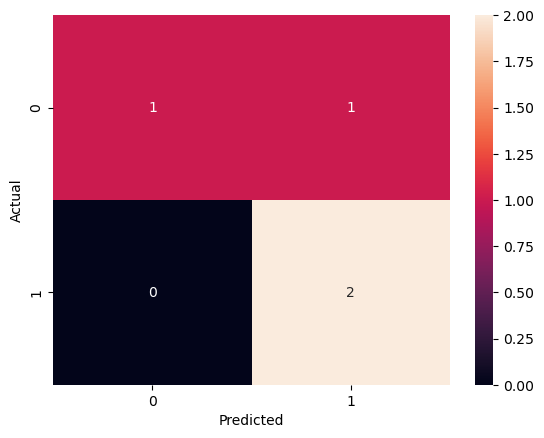

In [64]:
sns.heatmap(cn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## In above figure it is showing that 0 classed were 1 in actual but predicted as 0<br>2 classes weere 1 in actual and predicted as 1<br>1 class was 0 in actual and predicted as 1 and same for another